In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/colab_notebooks/algovera/defi/v2

/content/drive/MyDrive/colab_notebooks/algovera/defi/v2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data/30_compoundV2_mainnet_2021_2022.csv')

In [ ]:
df.columns

Index(['id', 'borrowRate', 'cash', 'collateralFactor', 'exchangeRate',
       'interestRateModelAddress', 'name', 'reserves', 'supplyRate', 'symbol',
       'totalBorrows', 'totalSupply', 'underlyingAddress', 'underlyingName',
       'underlyingPrice', 'underlyingSymbol', 'reserveFactor',
       'underlyingPriceUSD', 'timestamp'],
      dtype='object')

What is 
- cash?

- collateralfactor? 

- exchangeRate? 

- reserves?

- underlyingPrice?

- reserveFactor?

- difference btw underlyingPrice vs underlyingPriceUSD?


`borrowRate, supplyRate, totalBorrows, totalSupply` - these were the features we used previously, correct?

what are some of the other features u guys think will add meaningful signal?

The different addresses in the data r I guess the contract address?

In [ ]:
df.head(5)

,id,borrowRate,cash,collateralFactor,exchangeRate,interestRateModelAddress,name,reserves,supplyRate,symbol,totalBorrows,totalSupply,underlyingAddress,underlyingName,underlyingPrice,underlyingSymbol,reserveFactor,underlyingPriceUSD,timestamp
0,0x39aa39c021dfbae8fac545936693ac917d5e7563,0.094380,1.090111e+08,0.75,0.021379,0xd8ec56013ea119e7181d231e5048f90fbbe753c0,Compound USD Coin,4.897860e+05,0.074197,cUSDC,6.144258e+08,3.381572e+10,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USD//C,0.001336,USDC,75000000000000000,1.000000,1609471800
1,0x4ddc2d193948926d02f9b1fe9e1daa0718270ed5,0.023622,1.040458e+06,0.75,0.020030,0x0c3f8df27e1a00b47653fde878d68d35f00714c0,Compound Ether,1.118526e+02,0.000685,cETH,3.910705e+04,5.389069e+07,0x0000000000000000000000000000000000000000,Ether,1.000000,ETH,200000000000000000,748.490000,1609471800
2,0x5d3a536e4d6dbd6114cc1ead35777bab948e3643,0.107785,1.630969e+08,0.75,0.020877,0xfb564da37b41b2f6b6edcc3e56fbf523bd9f2012,Compound Dai,1.724288e+06,0.078992,cDAI,1.009593e+09,5.608807e+10,0x6b175474e89094c44da98b954eedeac495271d0f,Dai Stablecoin,0.001341,DAI,150000000000000000,1.003733,1609471800
3,0xf650c3d88d12db855b8bf7d11be6c55a4e07dcc9,0.133510,1.051888e+07,0.00,0.020484,0xfb564da37b41b2f6b6edcc3e56fbf523bd9f2012,Compound USDT,1.731669e+05,0.109392,cUSDT,8.023823e+07,4.422259e+09,0xdac17f958d2ee523a2206206994597c13d831ec7,Tether USD,0.001336,USDT,75000000000000000,1.000000,1609471800
4,0xf650c3d88d12db855b8bf7d11be6c55a4e07dcc9,0.132843,1.058156e+07,0.00,0.020484,0xfb564da37b41b2f6b6edcc3e56fbf523bd9f2012,Compound USDT,1.732111e+05,0.108771,cUSDT,8.023882e+07,4.425319e+09,0xdac17f958d2ee523a2206206994597c13d831ec7,Tether USD,0.001336,USDT,75000000000000000,1.000000,1609473600


In [ ]:
df['datetime'] = pd.to_datetime(df['timestamp'], 
                                utc=True, 
                                unit='s')

In [ ]:
df['timestamp'].value_counts()

1609471800    4
1638054800    4
1638046800    4
1638047600    4
1638048600    4
             ..
1623895200    4
1623896000    4
1623897000    4
1623897800    4
1652208200    4
Name: timestamp, Length: 47193, dtype: int64

In [ ]:
df['symbol'].value_counts()

cUSDC    47193
cETH     47193
cDAI     47193
cUSDT    47193
Name: symbol, dtype: int64

In [ ]:
df_dai = df[df['symbol'] == 'cDAI']
df_usdc = df[df['symbol'] == 'cUSDC']
df_usdt = df[df['symbol'] == 'cUSDT']
df_eth = df[df['symbol'] == 'cETH']

In [ ]:
toplot = ['borrowRate', 'cash', 'collateralFactor', 'exchangeRate', 'reserves', 'supplyRate', 
          'totalBorrows', 'totalSupply', 'underlyingPrice', 'reserveFactor', 'underlyingPriceUSD']

In [ ]:
def plot(df):
    fig, axes = plt.subplots(4, 3, figsize=(30,20))

    for i, top in enumerate(toplot):
        axes.flatten()[i].plot(df['datetime'], df[top])
        axes.flatten()[i].title.set_text(top)
        plt.tight_layout()

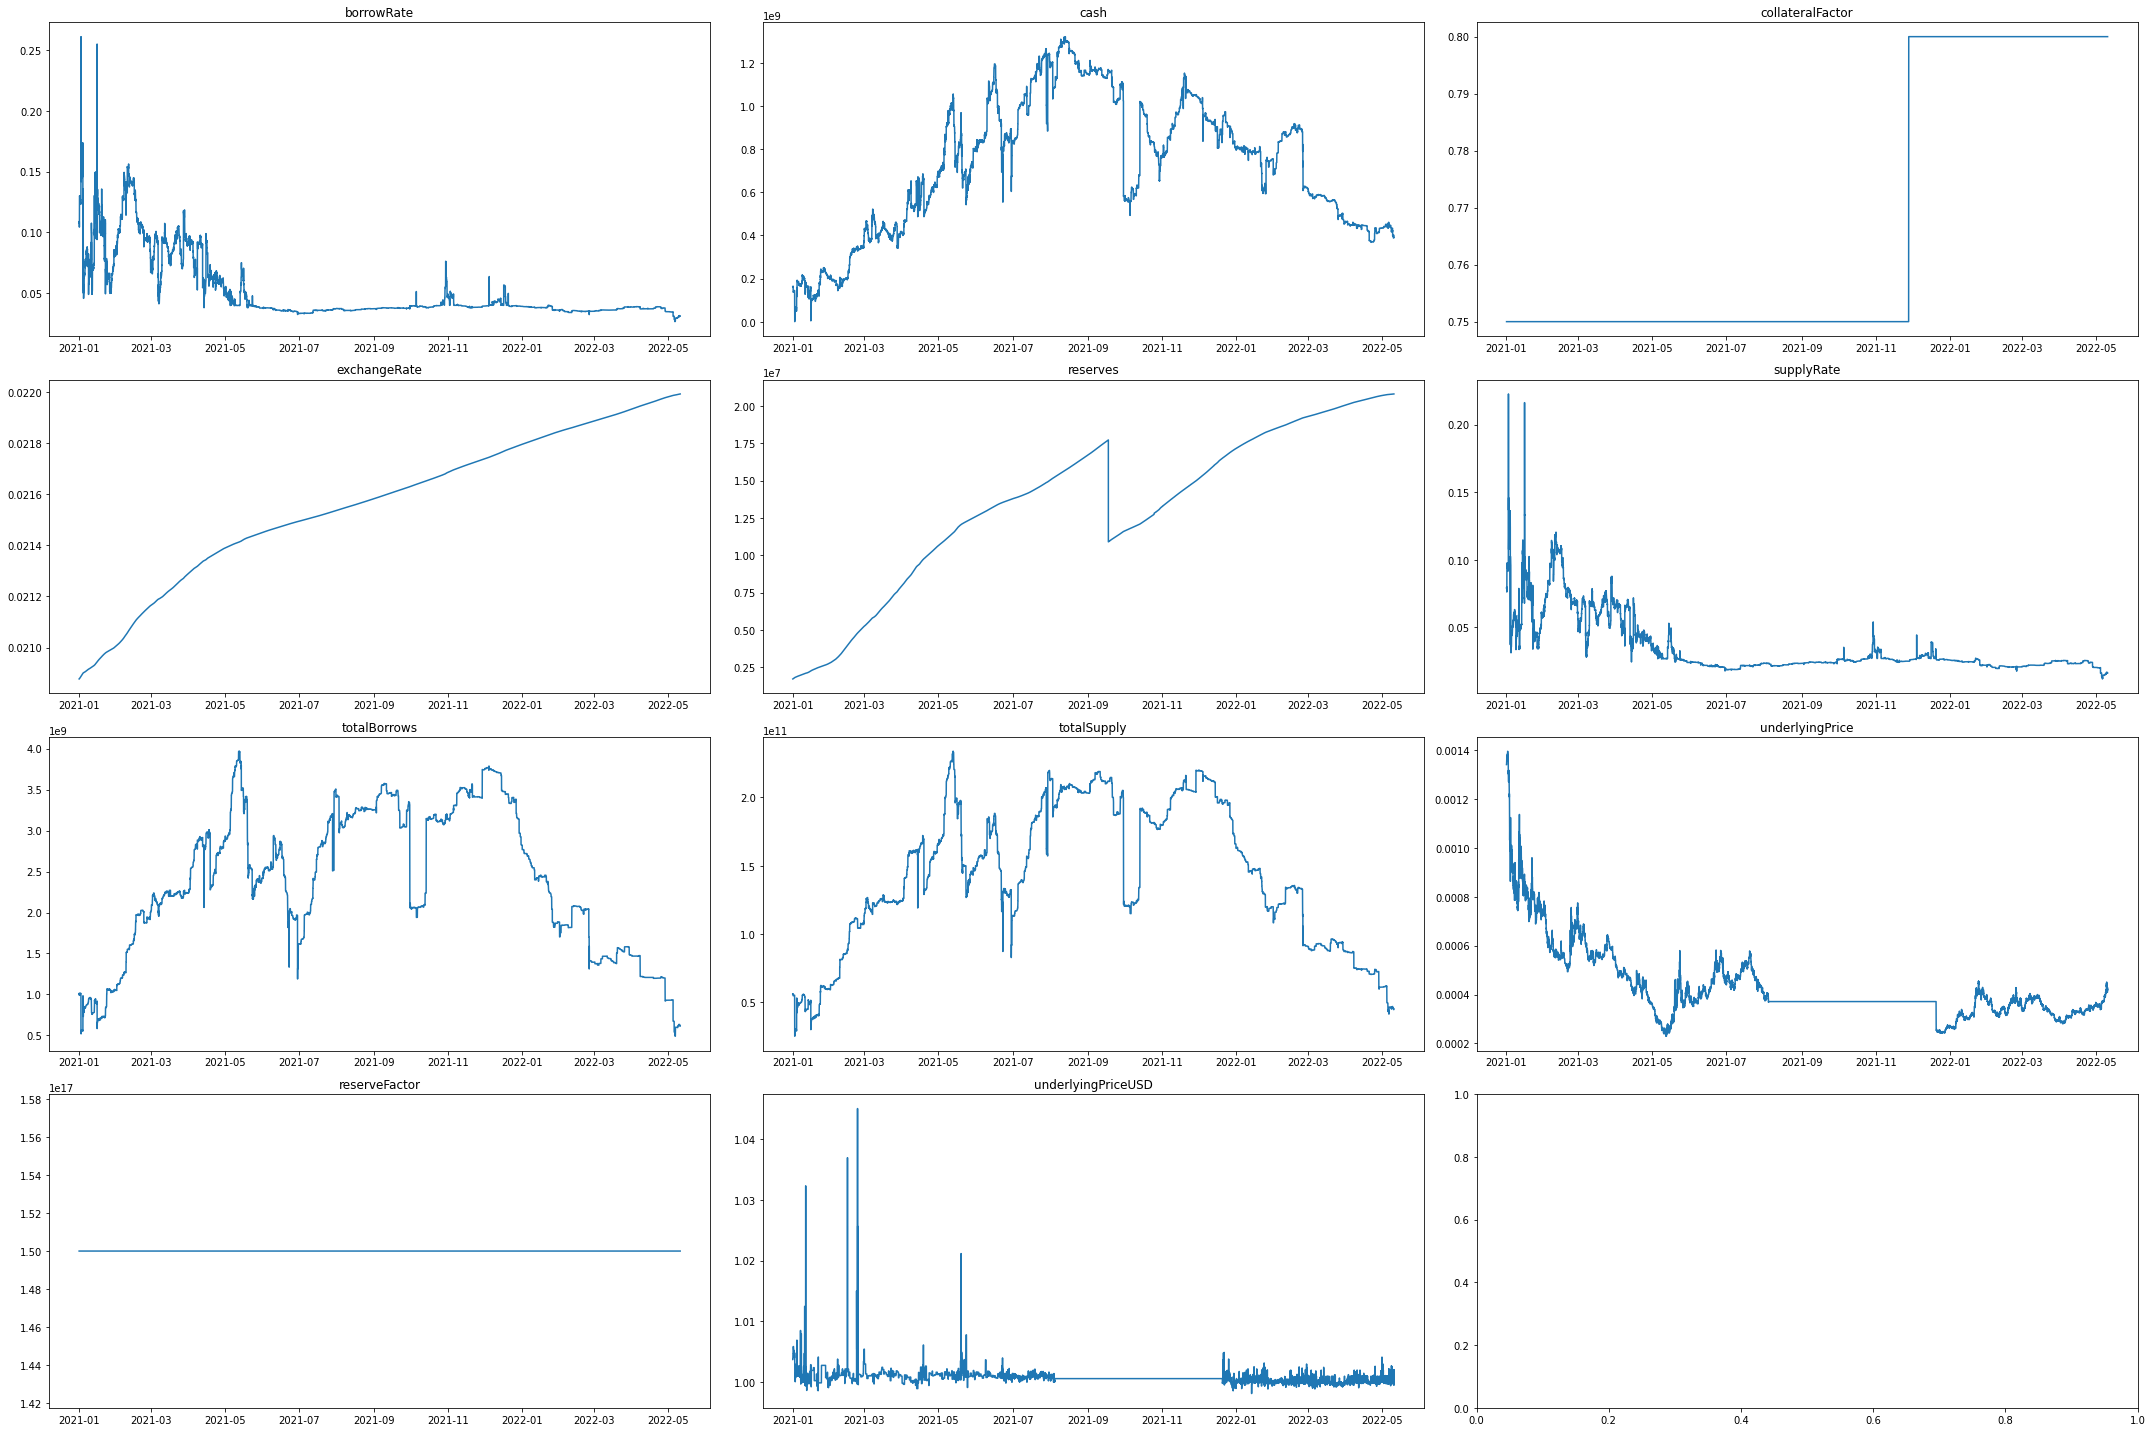

In [ ]:
plot(df_dai)

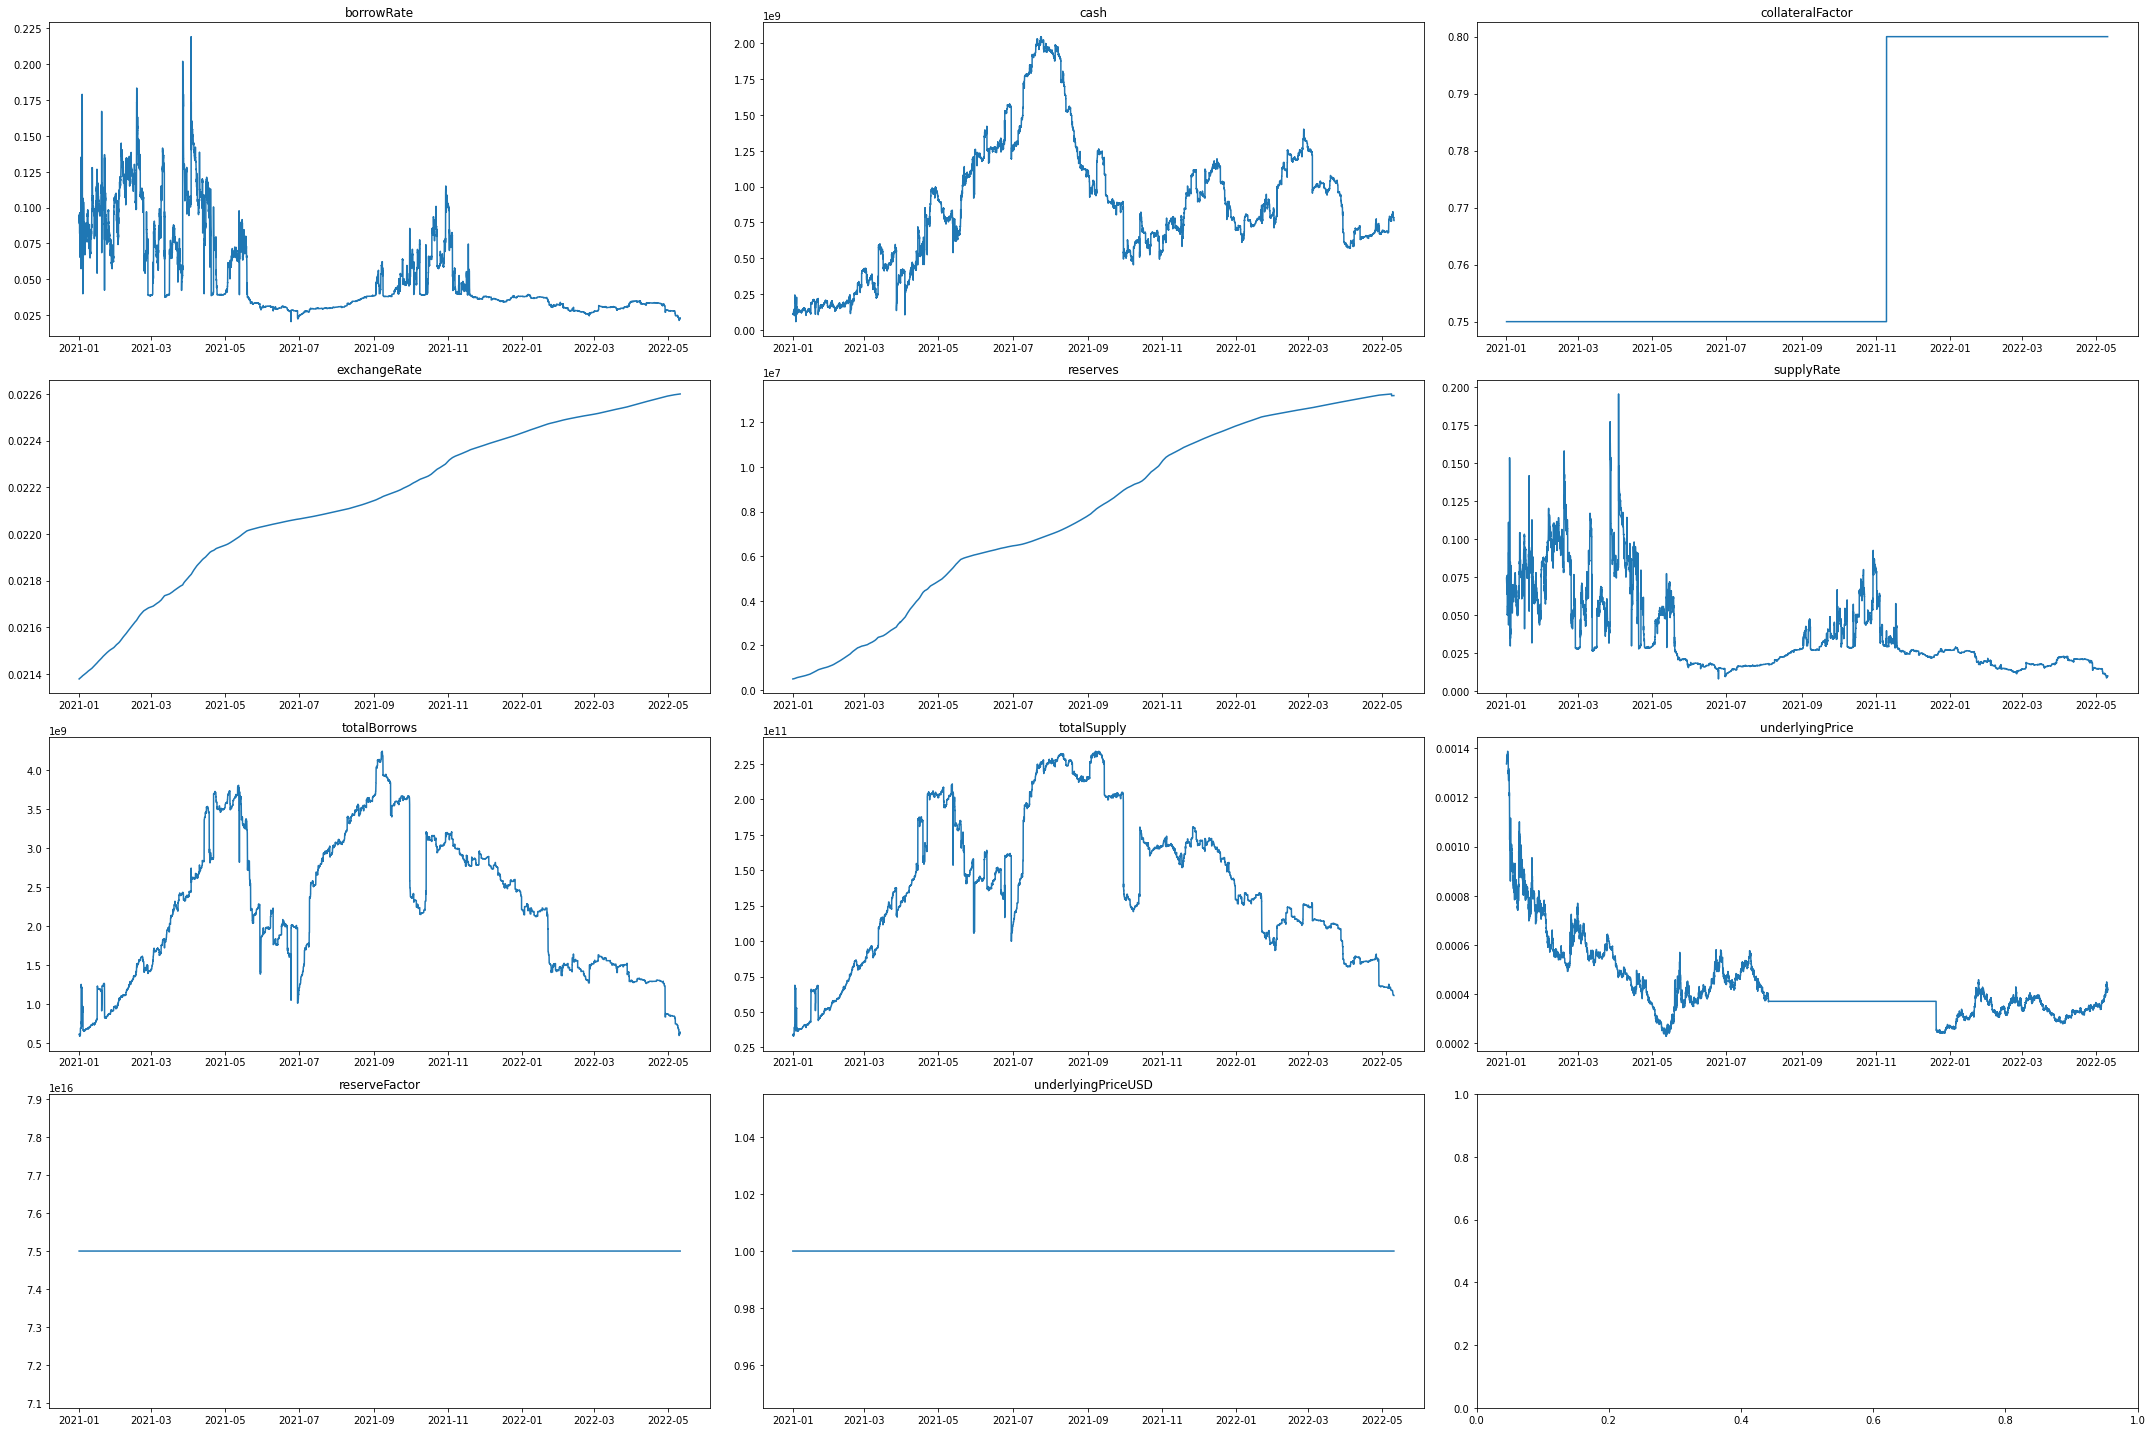

In [ ]:
plot(df_usdc)

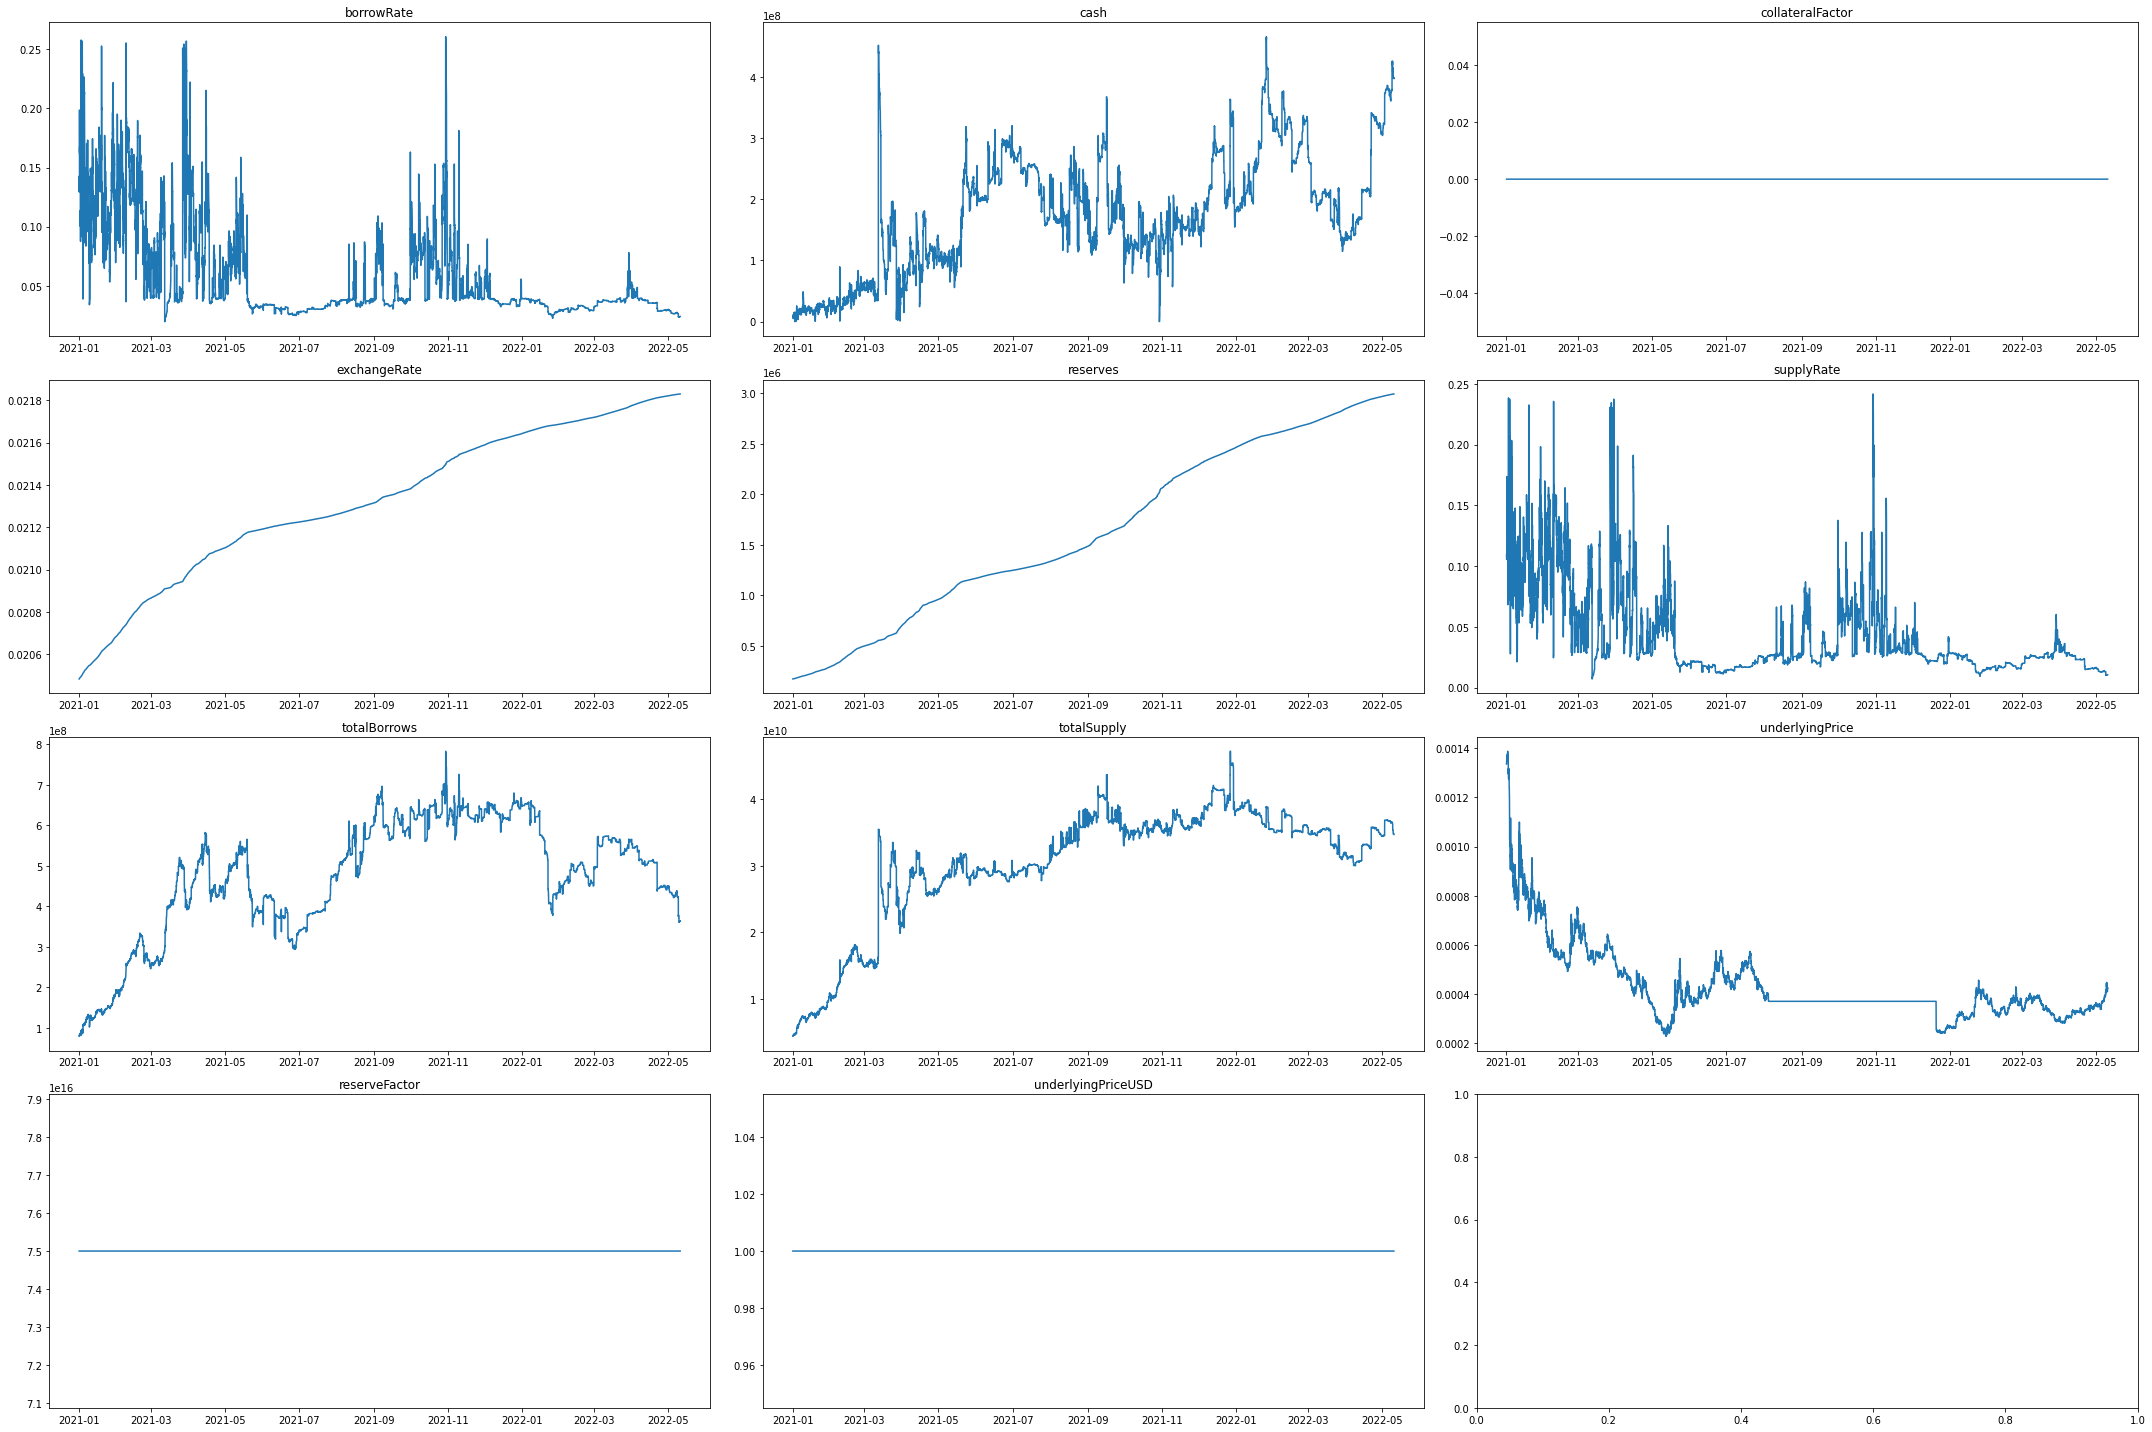

In [ ]:
plot(df_usdt)

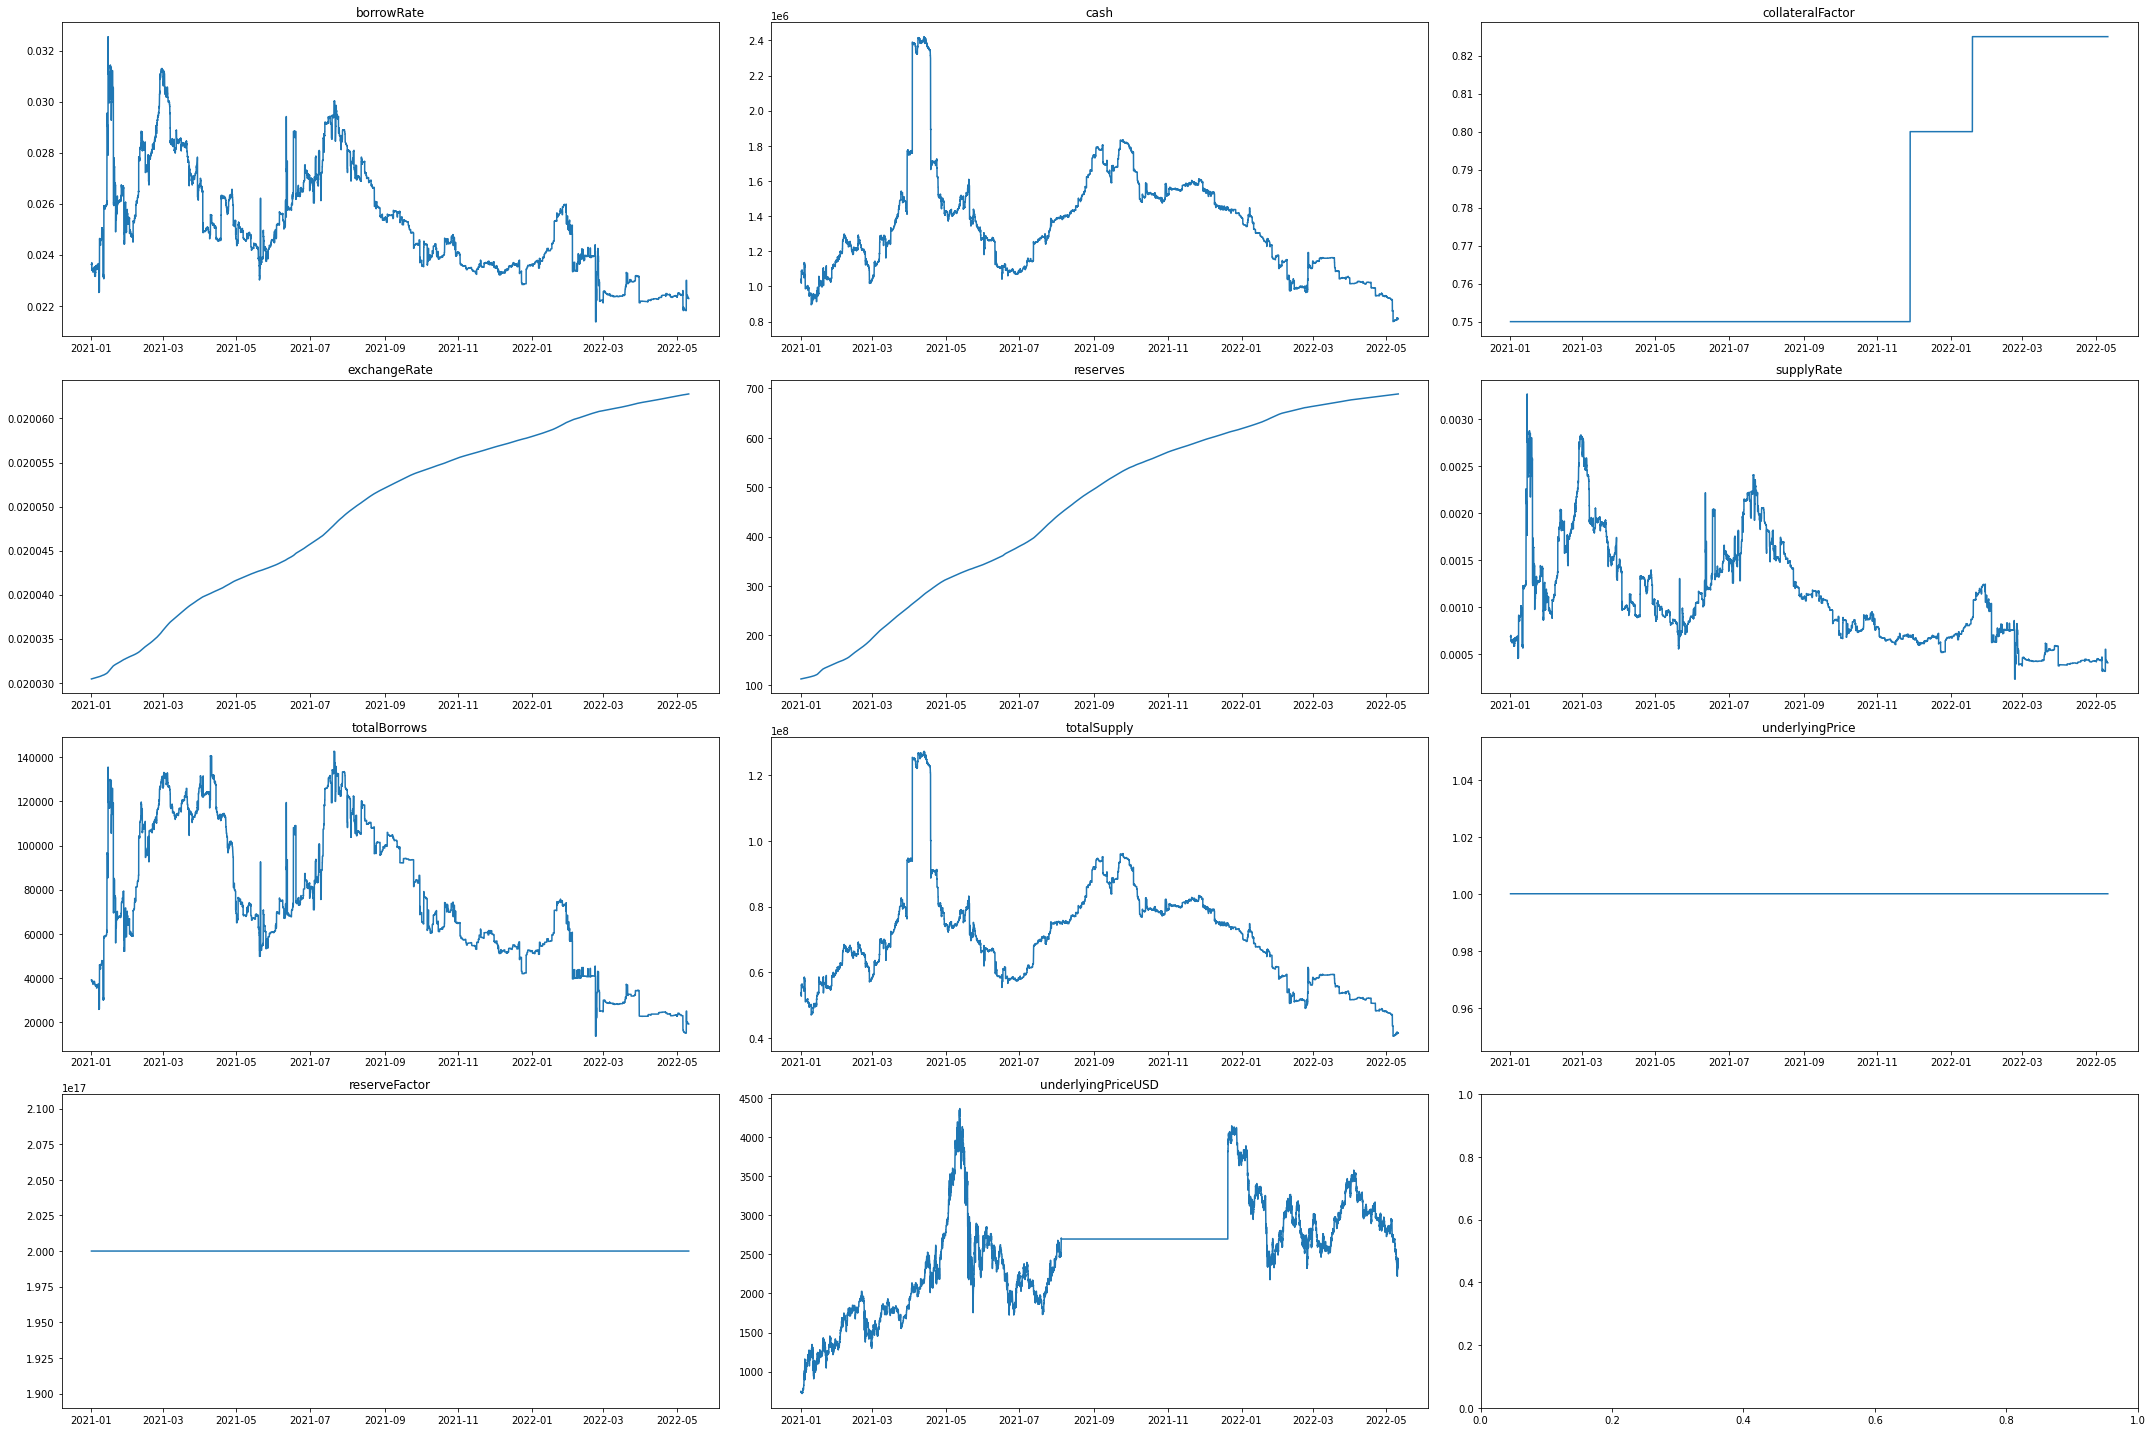

In [ ]:
plot(df_eth)

In [ ]:
df.columns

Index(['id', 'borrowRate', 'cash', 'collateralFactor', 'exchangeRate',
       'interestRateModelAddress', 'name', 'reserves', 'supplyRate', 'symbol',
       'totalBorrows', 'totalSupply', 'underlyingAddress', 'underlyingName',
       'underlyingPrice', 'underlyingSymbol', 'reserveFactor',
       'underlyingPriceUSD', 'timestamp', 'datetime'],
      dtype='object')

In [ ]:
df_dai['interestRateModelAddress'].nunique()

1

In [ ]:
df_usdc['interestRateModelAddress'].nunique()

1

In [ ]:
df_usdt['interestRateModelAddress'].nunique()

1

In [ ]:
df_eth['interestRateModelAddress'].nunique()

1

In [ ]:
df_dai['interestRateModelAddress'].unique() == df_eth['interestRateModelAddress'].unique()

array([False])

In [ ]:
df_dai['underlyingAddress'].nunique()

1

In [ ]:
df_usdc['underlyingAddress'].nunique()

1

In [ ]:
df_usdt['underlyingAddress'].nunique()

1

In [ ]:
df_eth['underlyingAddress'].nunique()

1

## Correlation of underlying's borrowrate and supplyrate

In [ ]:
df_dai['borrowRate'].corr(df_dai['supplyRate'])

0.9990903112973518

In [ ]:
df_usdc['borrowRate'].corr(df_usdc['supplyRate'])

0.9986929855791613

In [ ]:
df_usdt['borrowRate'].corr(df_usdt['supplyRate'])

0.9988845472564731

In [ ]:
df_eth['borrowRate'].corr(df_eth['supplyRate'])

0.996991641204123

In [ ]:
df1 = pd.DataFrame()
for tok in df.symbol.unique():
    df_tok = df[df['symbol']==tok]
    df_tok = df_tok.drop(['symbol', 'datetime'], axis=1)

    col_names = []
    for col in df_tok.columns:
        if col == 'timestamp':
            col_names.append(f'{col}')
        else:
            col_names.append(f'{tok}_{col}')
        
    df_tok.columns = col_names
    #df_tok = df_tok.set_index('Timestamp', drop=True)
    
    if df1.empty:
        df1 = df_tok
    else:
        df1 = pd.merge(df1, df_tok, on='timestamp')

In [ ]:
len(df.columns)

20

In [ ]:
df1.columns

Index(['cUSDC_id', 'cUSDC_borrowRate', 'cUSDC_cash', 'cUSDC_collateralFactor',
       'cUSDC_exchangeRate', 'cUSDC_interestRateModelAddress', 'cUSDC_name',
       'cUSDC_reserves', 'cUSDC_supplyRate', 'cUSDC_totalBorrows',
       'cUSDC_totalSupply', 'cUSDC_underlyingAddress', 'cUSDC_underlyingName',
       'cUSDC_underlyingPrice', 'cUSDC_underlyingSymbol',
       'cUSDC_reserveFactor', 'cUSDC_underlyingPriceUSD', 'timestamp',
       'cETH_id', 'cETH_borrowRate', 'cETH_cash', 'cETH_collateralFactor',
       'cETH_exchangeRate', 'cETH_interestRateModelAddress', 'cETH_name',
       'cETH_reserves', 'cETH_supplyRate', 'cETH_totalBorrows',
       'cETH_totalSupply', 'cETH_underlyingAddress', 'cETH_underlyingName',
       'cETH_underlyingPrice', 'cETH_underlyingSymbol', 'cETH_reserveFactor',
       'cETH_underlyingPriceUSD', 'cDAI_id', 'cDAI_borrowRate', 'cDAI_cash',
       'cDAI_collateralFactor', 'cDAI_exchangeRate',
       'cDAI_interestRateModelAddress', 'cDAI_name', 'cDAI_reserves',
  

In [ ]:
selcols =['cUSDC_borrowRate', 'cUSDC_cash', 'cUSDC_exchangeRate', 
          'cUSDC_reserves', 'cUSDC_supplyRate', 'cUSDC_totalBorrows', 
          'cUSDC_totalSupply', 'cUSDC_underlyingPrice', 

          'cETH_borrowRate', 'cETH_cash', 'cETH_exchangeRate', 
          'cETH_reserves', 'cETH_supplyRate', 'cETH_totalBorrows', 
          'cETH_totalSupply', 'cETH_underlyingPrice',

          'cDAI_borrowRate', 'cDAI_cash', 'cDAI_exchangeRate', 
          'cDAI_reserves', 'cDAI_supplyRate', 'cDAI_totalBorrows', 
          'cDAI_totalSupply', 'cDAI_underlyingPrice',
          
          'cUSDT_borrowRate', 'cUSDT_cash', 'cUSDT_exchangeRate', 
          'cUSDT_reserves', 'cUSDT_supplyRate', 'cUSDT_totalBorrows', 
          'cUSDT_totalSupply', 'cUSDT_underlyingPrice']

In [ ]:
df1 = df1[selcols]

In [ ]:
import seaborn as sns

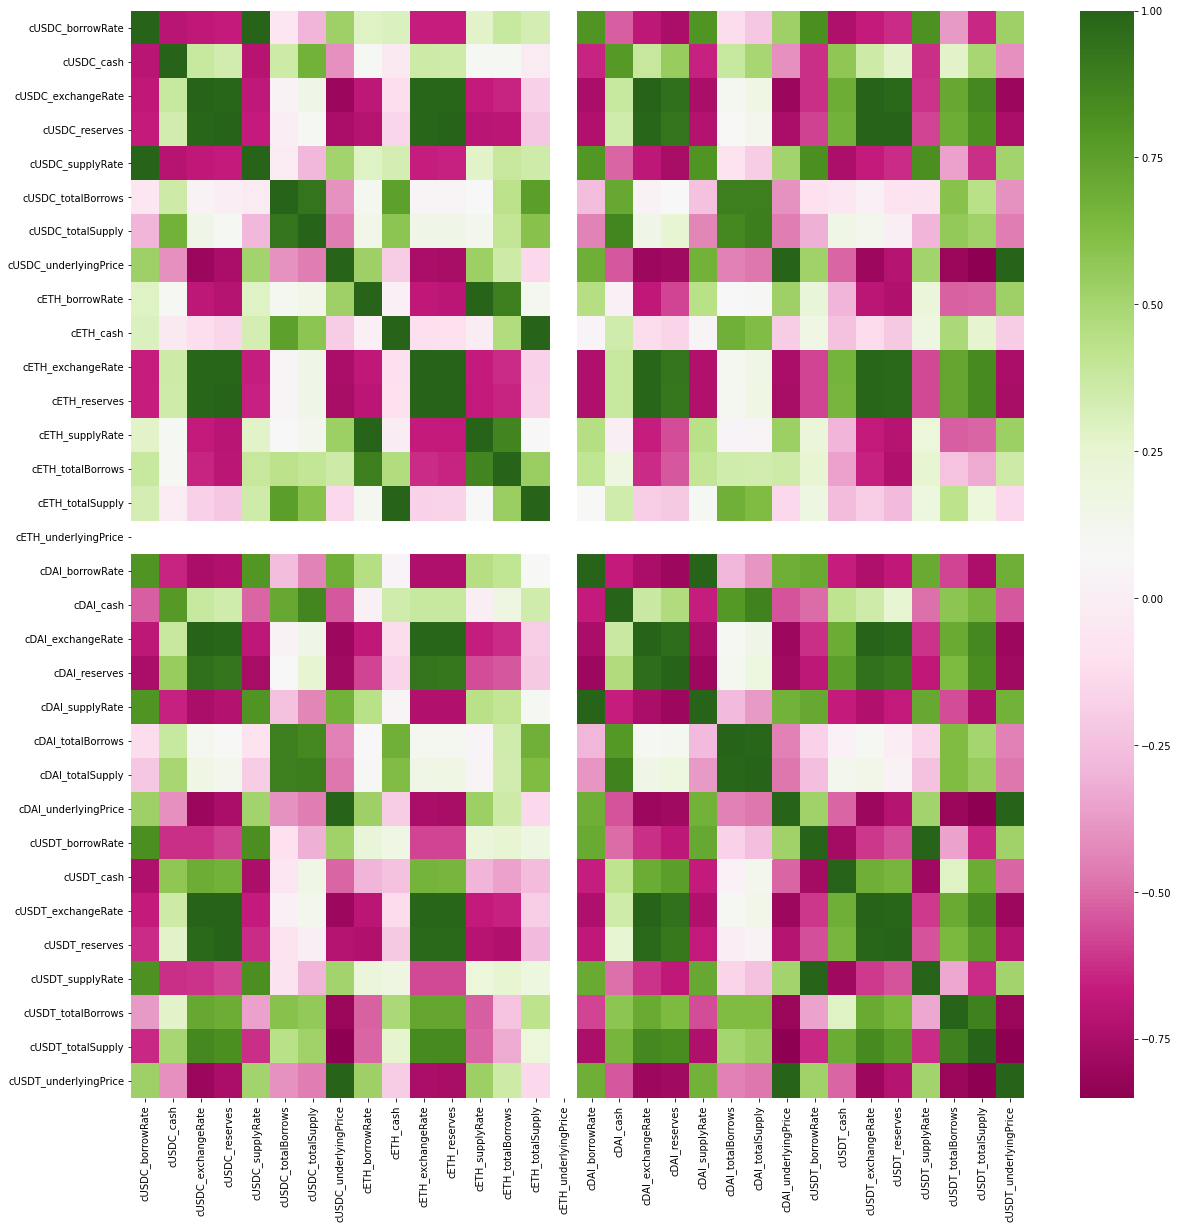

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(), cmap="PiYG")